# Spatial networks

Course from Big data course at CRI 2019 https://github.com/Big-data-course-CRI/materials_big_data_cri_2019

## Airport travel networks

We start with visualising spatially embedded data of airport travel networks. 
We use openflights open data https://openflights.org/data.html#airline. There are many ways of visualising it and making statistics of airports connections: 
    1. counting lengths of connections 
    2. finding hubs etc.


## How do we construct a network?
It is very simple. 
In our network we will have nodes, airports and routes be our links in the travel network.
 

In [1]:
# Analysis of global mobility patterns

# Import the pandas library.
import pandas
import csv
import numpy as np
import pandas


# convert dat file to csv 
# read flash.dat to a list of lists
print('reading airports')

# Read in the airports data.
airports = pandas.read_csv('data_airports/airports.dat', header=None, dtype=str)#("C:/Users/lyubo/Documents/DATA_networks/mobilitydata/openflights/airports.dat", header=None, dtype=str)
airlines = pandas.read_csv('data_airports/airlines.dat', header=None, dtype=str)
routes = pandas.read_csv('data_airports/routes.dat', header=None, dtype=str)


airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "offset", "dst", "timezone", "type", "nametype"]
# Read in the airlines data.airlines = pandas.read_csv("airlines.csv", header=None, dtype=str)
print('reading airlines')
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]

# Read in the routes data.routes = pandas.read_csv("routes.csv", header=None, dtype=str)
print('reading routes')
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]

print("data loading finished")
airports.head()


reading airports
reading airlines
reading routes
data loading finished


id                                         name          city  \
0  1                               Goroka Airport        Goroka   
1  2                               Madang Airport        Madang   
2  3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3  4                               Nadzab Airport        Nadzab   
4  5  Port Moresby Jacksons International Airport  Port Moresby   

            country code  icao            latitude           longitude  \
0  Papua New Guinea  GKA  AYGA  -6.081689834590001       145.391998291   
1  Papua New Guinea  MAG  AYMD      -5.20707988739       145.789001465   
2  Papua New Guinea  HGU  AYMH  -5.826789855957031  144.29600524902344   
3  Papua New Guinea  LAE  AYNZ           -6.569803          146.725977   
4  Papua New Guinea  POM  AYPY  -9.443380355834961  147.22000122070312   

  altitude offset dst              timezone     type     nametype  
0     5282     10   U  Pacific/Port_Moresby  airport  OurAirports  
1       20     10   U  Pacific/Port_Moresby  airport  OurAirports  
2     5388     10   U  Pacific/Port_Moresby  airport  OurAirports  
3      239     10   U  Pacific/Port_Moresby  airport  OurAirports  
4      146     10   U  Pacific/Port_Moresby  airport  OurAirports

In [2]:
# routes will be our links in the travel network
routes.head(5)

airline airline_id source source_id dest dest_id codeshare stops equipment
0      2B        410    AER      2965  KZN    2990       NaN     0       CR2
1      2B        410    ASF      2966  KZN    2990       NaN     0       CR2
2      2B        410    ASF      2966  MRV    2962       NaN     0       CR2
3      2B        410    CEK      2968  KZN    2990       NaN     0       CR2
4      2B        410    CEK      2968  OVB    4078       NaN     0       CR2

In [3]:
#to ensure numerical data for routes: data cleaning for making ONLY numerical values
routes = routes[routes["airline_id"] != "\\N"]


## Visualisation of a network
We first plot just nodes of a network, airports. This is good to do if the network is messy to be sure that everything is fine.

First we define $x$ as ids of airports
#name_lengths = airlines["name"].apply(lambda x: len(str(x)))
#plt.scatter(airlines["id"].astype(int), name_lengths)



C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


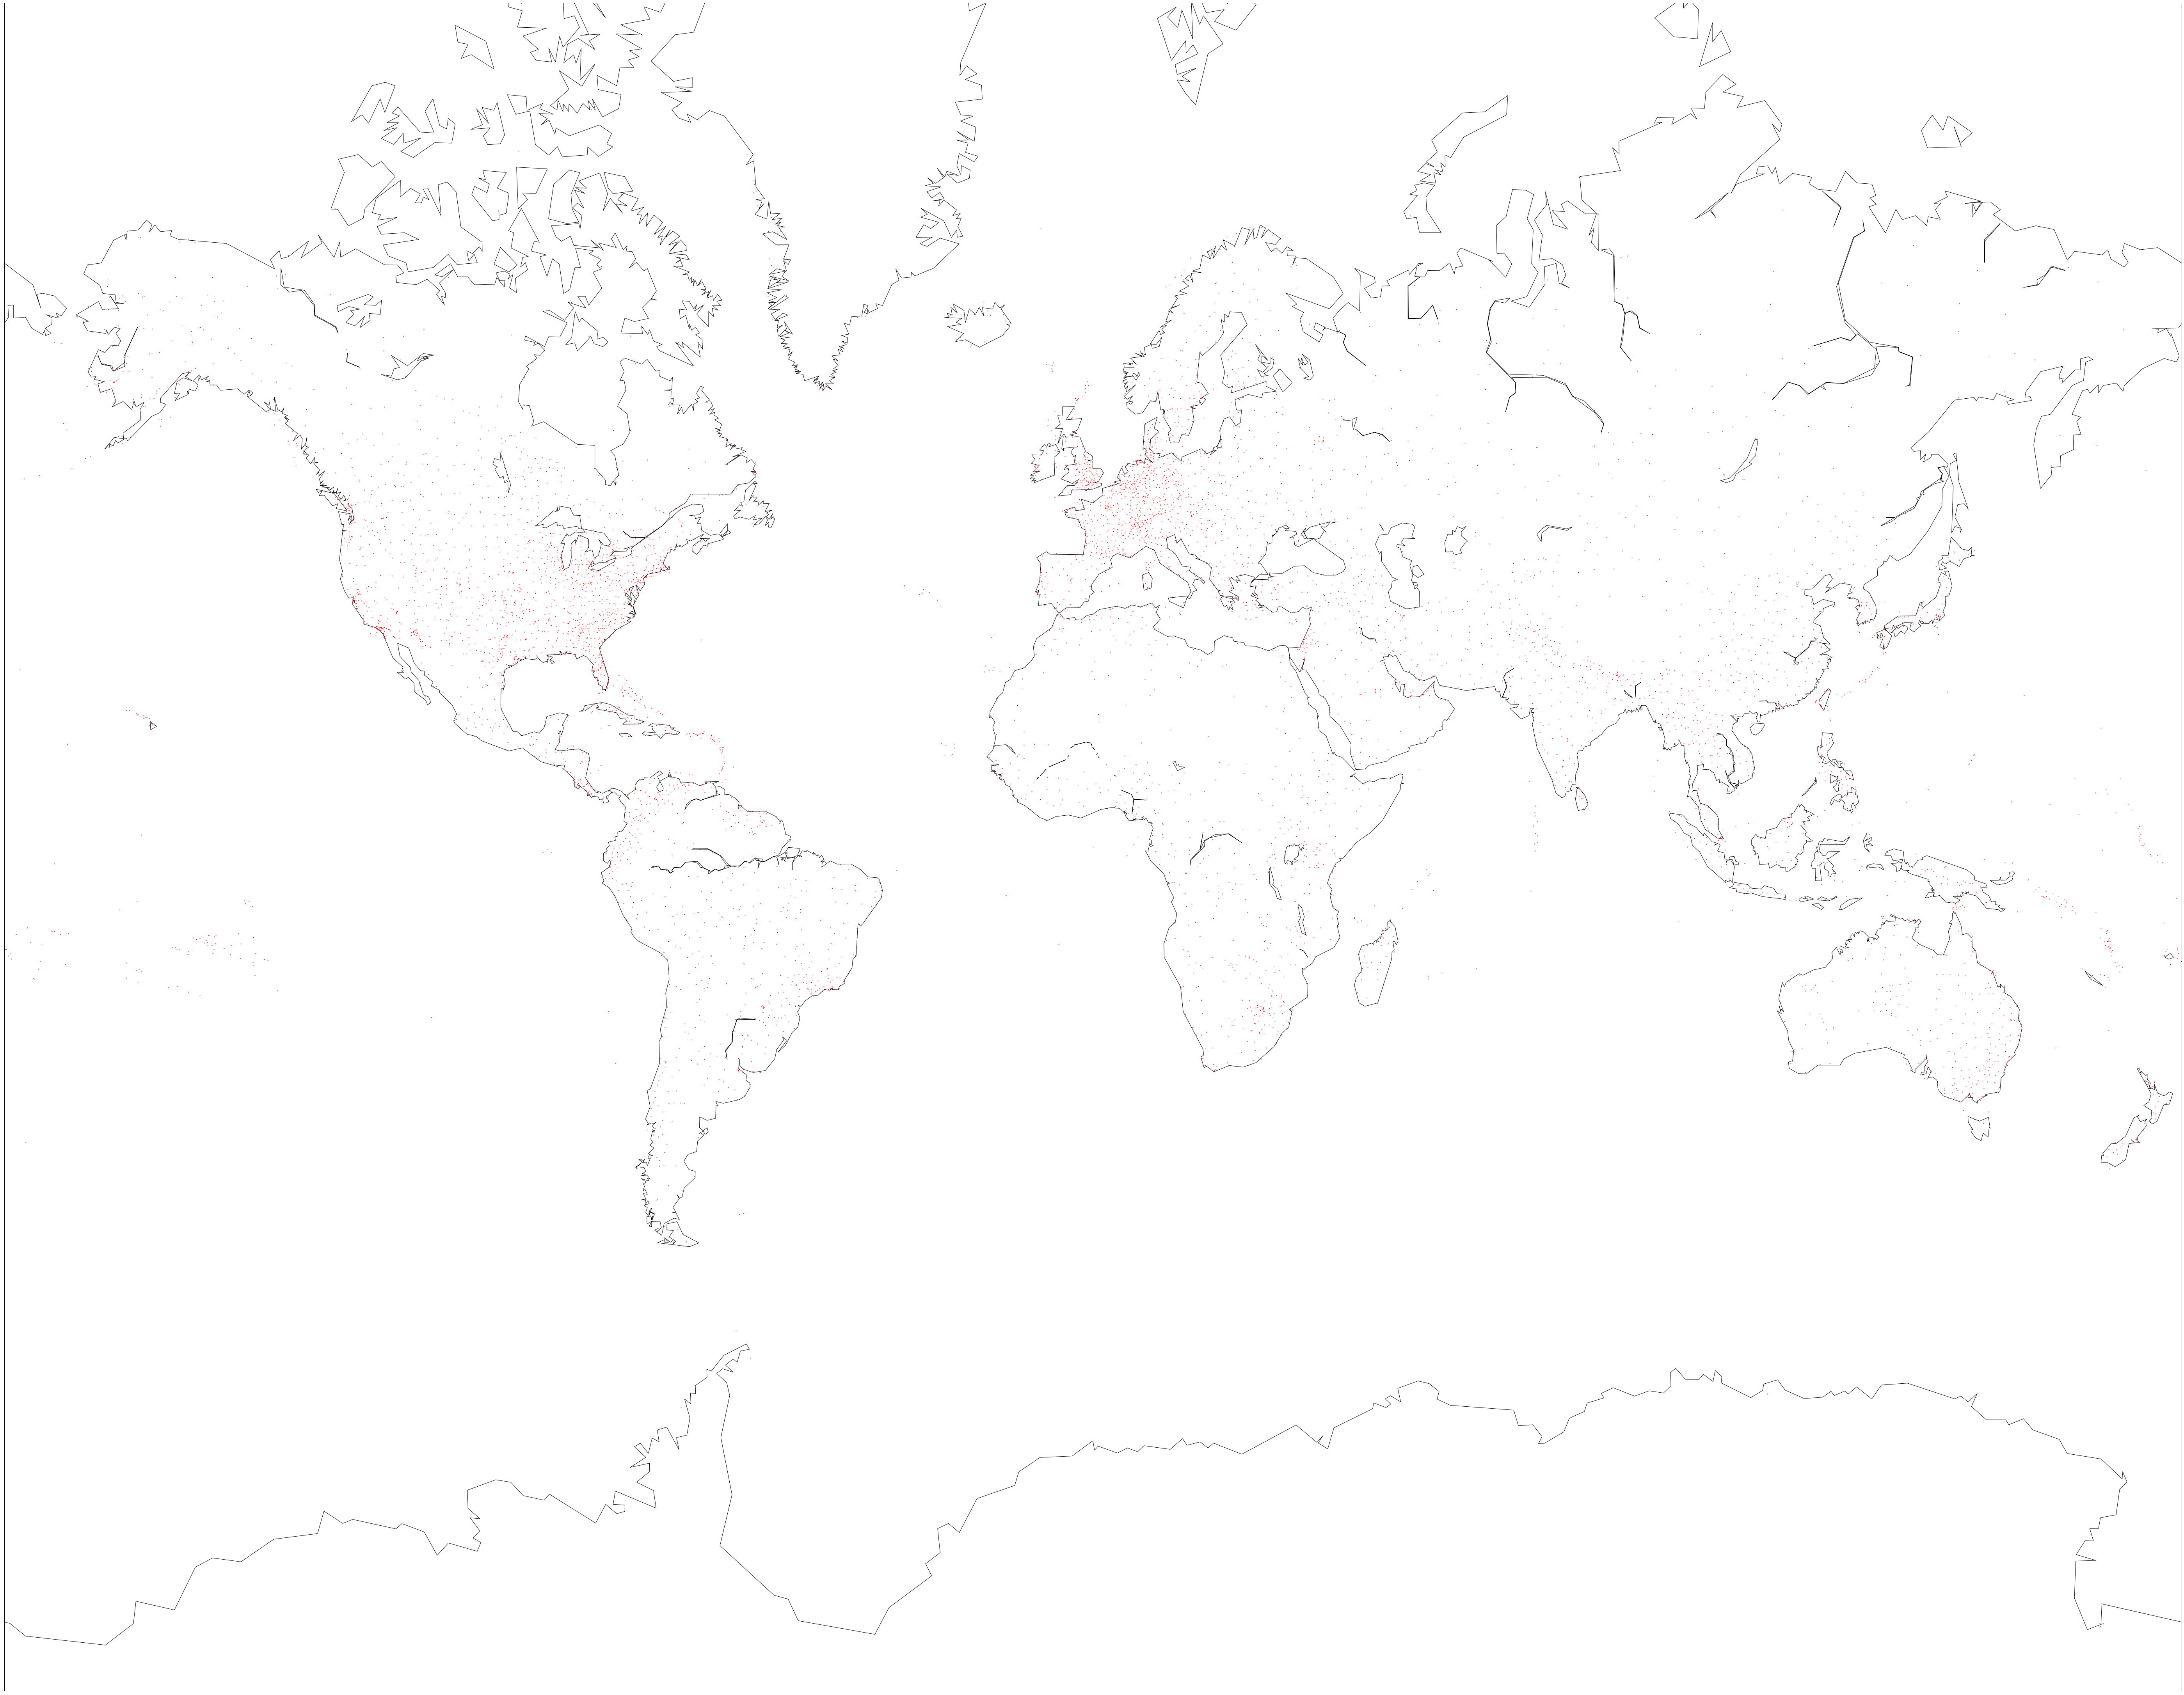

In [9]:

#data = pandas.DataFrame({"lengths": name_lengths, "ids": airlines["id"].astype(int)})
#seaborn.jointplot(x="ids", y="lengths", data=data)

# using latitude and longitude pairs for airports. The first map we can make is one that shows all the airports all over the world. We can do this with the basemap extension to matplotlib. This enables drawing world maps and adding points, and is very customizable.

# Import the basemap package
from mpl_toolkits.basemap import Basemap

# For figure use mercator projection, and showing the whole world.
fig, ax = plt.subplots(figsize=(100, 100))

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.

# plot the whole world
#ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
#ax2 = world[world.continent == 'Africa'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')


m.drawcoastlines()
m.drawmapboundary()

# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()


C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


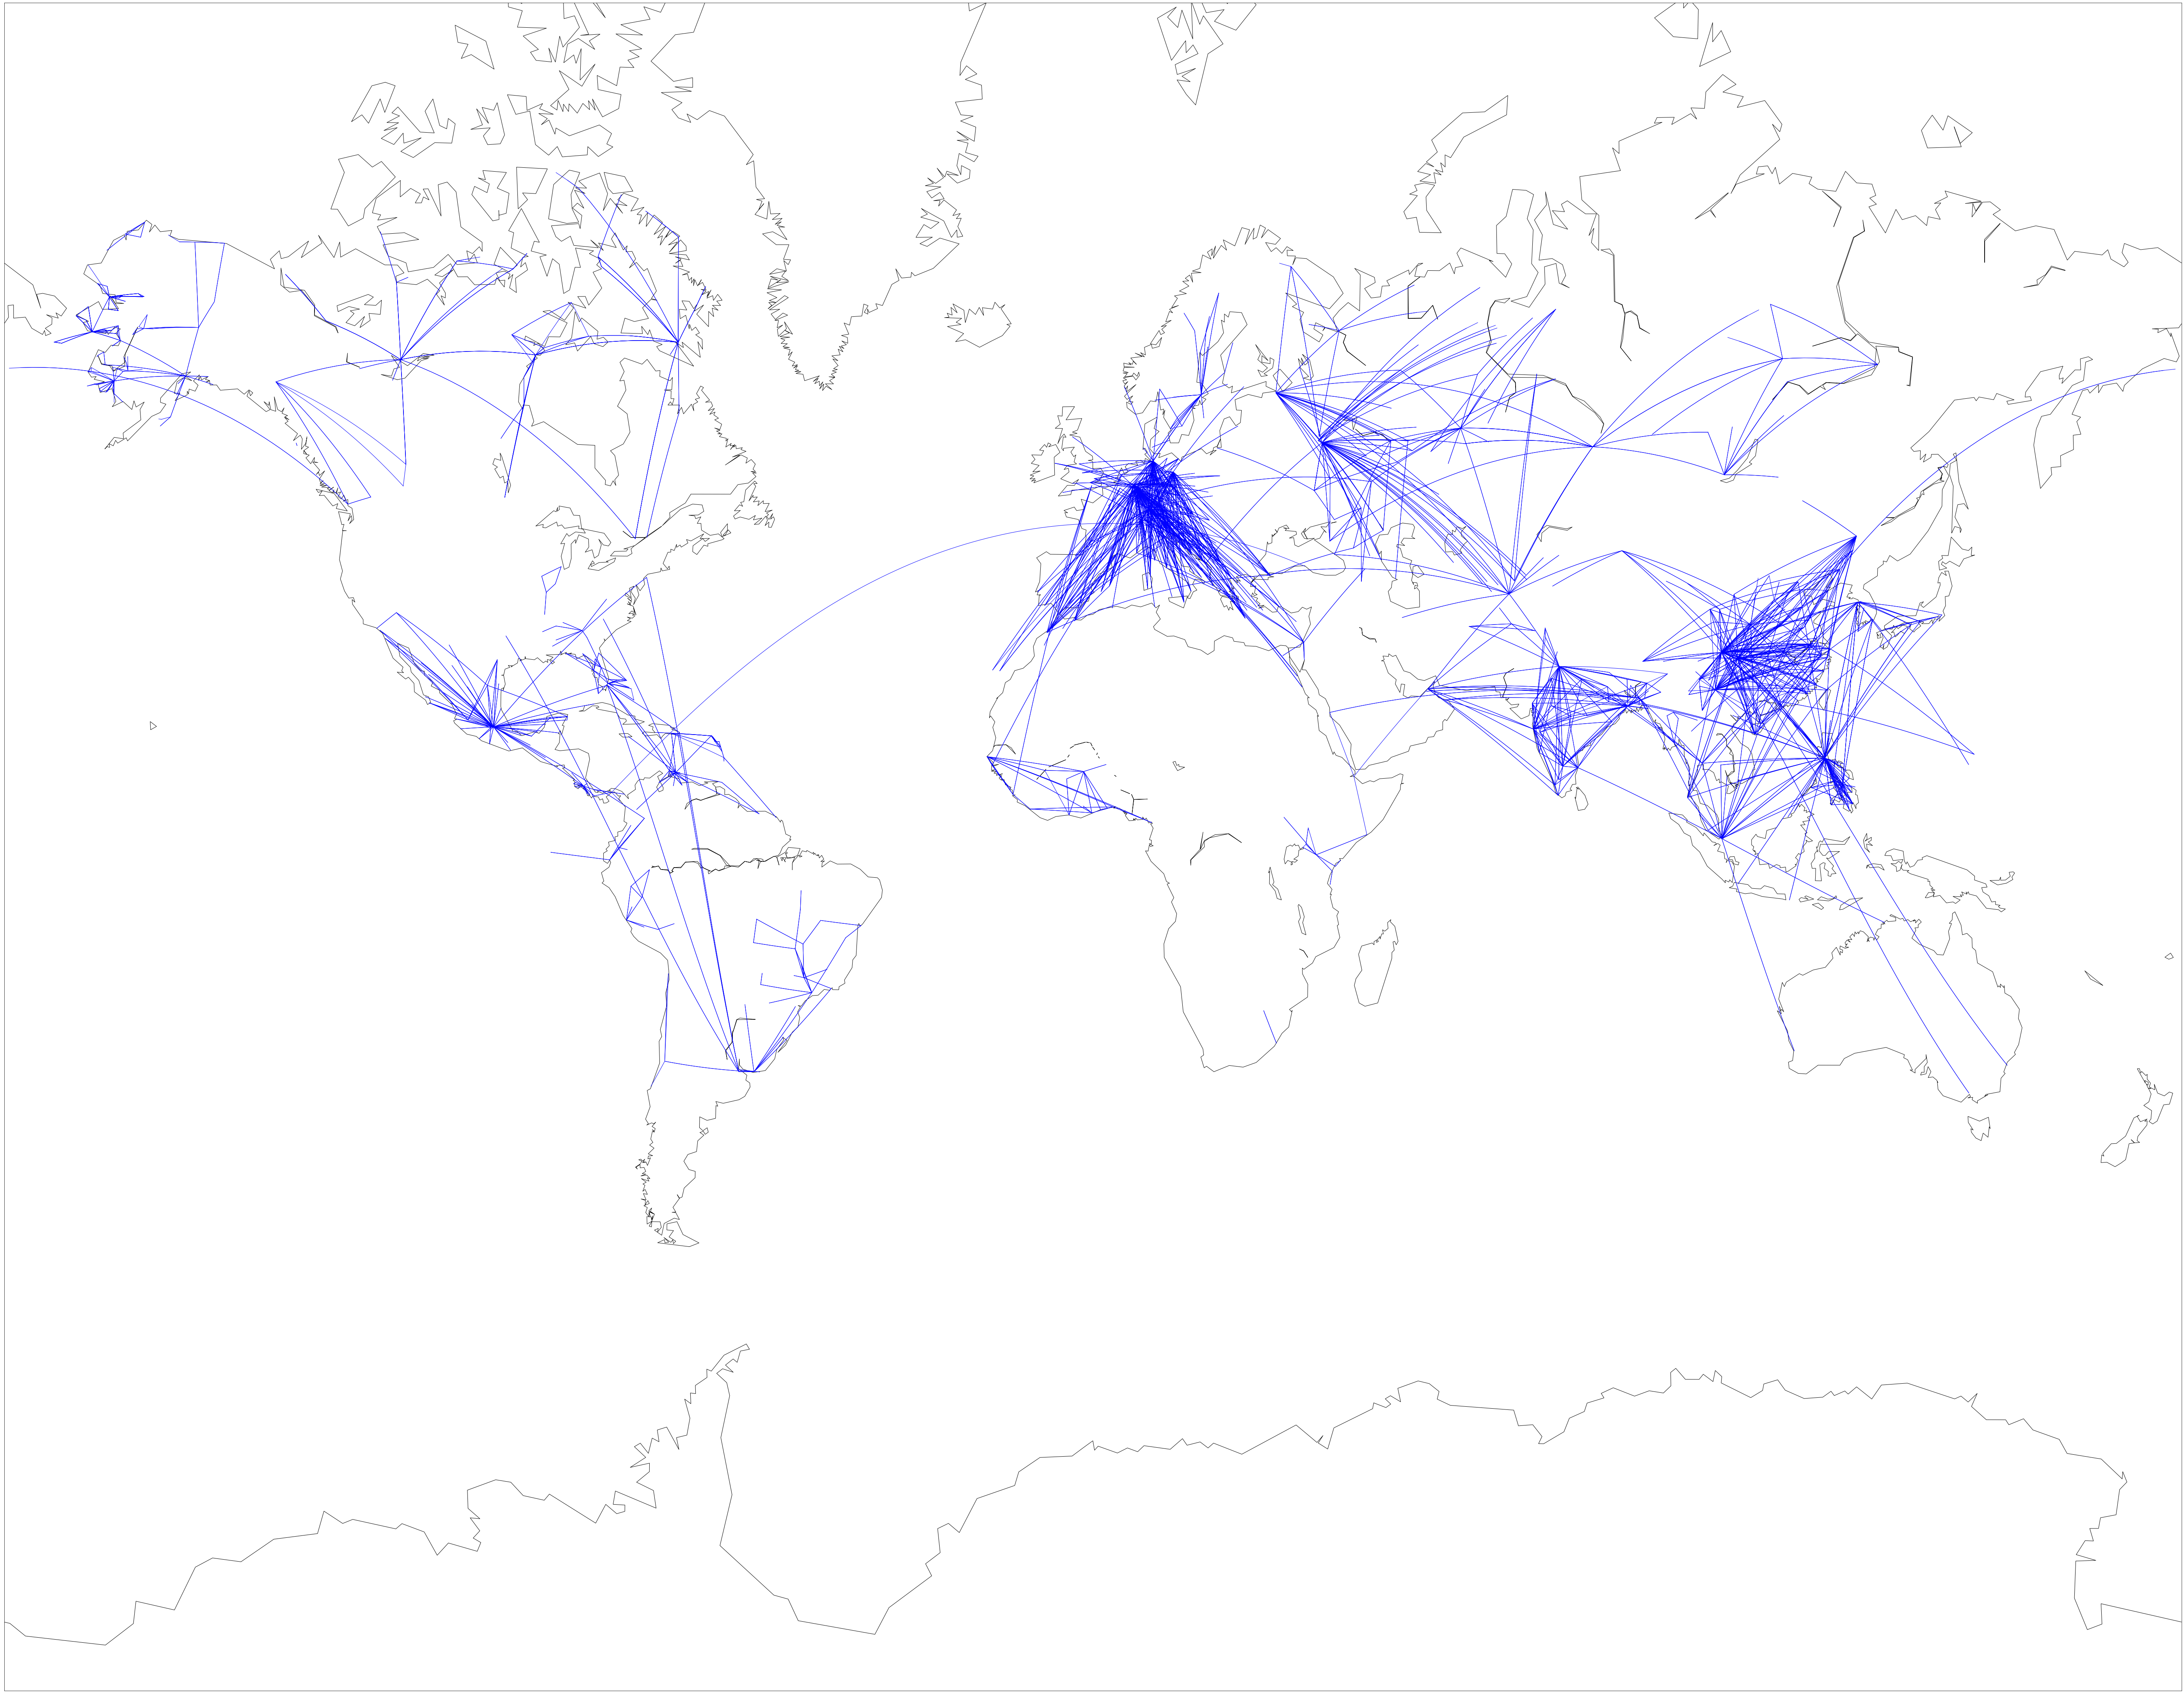

In [10]:
# Make a base map with a mercator projection.
# Now we can draw lines and connections
from mpl_toolkits.basemap import Basemap


fig, ax = plt.subplots(figsize=(100, 100))

m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
# Iterate through the first 3000 rows.
for name, row in routes[:3000].iterrows():
    try:
        # Get the source and dest airports.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Don't draw overly long routes.
        # Or draw if we put it as 1000 !!!!! 
        
        if abs(float(source["longitude"]) - float(dest["longitude"])) < 2000:
            # Draw a great circle between source and dest airports.
            m.drawgreatcircle(float(source["longitude"]), float(source["latitude"]), float(dest["longitude"]), float(dest["latitude"]),linewidth=1,color='b')
    except (ValueError, IndexError):
        pass
# Show the map.
#plt.figure(figsize=(50,50))    
    
plt.show()




## Statistics of trips 
Here we can count the length of routes (links in our network). 
This can tell us if airlines fly more shorter routes, or more longer ones. 


In [ ]:

import math
import matplotlib.pyplot as plt

import seaborn

def haversine(lon1, lat1, lon2, lat2):
    # Convert coordinates to floats.
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    # Convert to radians from degrees.
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Compute distance.
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    km = 6367 * c
    return km

# function copied from https://www.dataquest.io/blog/python-data-visualization-libraries/

def calc_dist(row):
    dist = 0
    try:
        # Match source and destination to get coordinates.
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        # Use coordinates to compute distance.
        dist = haversine(dest["longitude"], dest["latitude"], source["longitude"], source["latitude"])
    except (ValueError, IndexError):
        pass
    return dist


# now we apply this function to routes dataframe
route_lengths = routes.apply(calc_dist, axis=1)



# now we are plotting the histogram 
plt.hist(route_lengths, bins=20)
plt.xlabel('Distance')
plt.show()

seaborn.distplot(route_lengths, bins=20)
plt.show()

## Mobility data on a network 

We can also analyze and visualise mobility data on a network. We can take open data:
    1. USA taxi data https://github.com/brianbader/nyc_taxi
    2. SCNF train data https://github.com/Liyubov/tidytuesday/tree/master/data/2019/2019-02-26 
    
Feel free to find your favourite dataset.